# Clustering model to segment customers

## Importing

In [1]:
import mlflow
import dagshub
import os
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from utils import *

## Loading Processed Data

In [2]:
data = joblib.load("../data/processed/processed_data.joblib")

In [3]:
X_train = data["X_train"]

In [4]:
X_train

,Customer_Age,Education,Income,Kidhome,Teenhome,Customer_Tenure,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Response,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
314923,-0.222222,0.0,-0.173230,1.0,0.0,-0.758639,-0.94,-0.366594,0.206897,-0.217593,...,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
178293,1.111111,1.0,0.204662,1.0,0.0,0.097192,0.18,1.266811,1.965517,0.236111,...,0.0,0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
315605,0.111111,1.0,0.034197,1.0,1.0,0.571274,-0.86,-0.305857,-0.172414,-0.226852,...,1.0,0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17654,0.111111,2.0,0.582588,0.0,1.0,0.313175,0.48,-0.175705,0.275862,-0.134259,...,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
262691,0.000000,0.0,-0.211287,0.0,0.0,0.117711,-0.08,-0.379610,-0.068966,-0.300926,...,0.0,0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238190,-0.055556,0.0,-0.476231,1.0,1.0,0.832073,0.84,0.670282,1.620690,0.689815,...,0.0,0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
135435,-0.722222,0.0,-0.391280,1.0,1.0,0.581533,0.22,-0.195228,0.689655,0.300926,...,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
316503,-0.777778,1.0,-0.288391,0.0,0.0,0.679806,-0.34,-0.277657,-0.172414,-0.268519,...,0.0,0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
216344,-0.111111,2.0,1.225954,1.0,0.0,-0.971382,0.02,-0.056399,-0.034483,-0.018519,...,0.0,0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Model Implementation

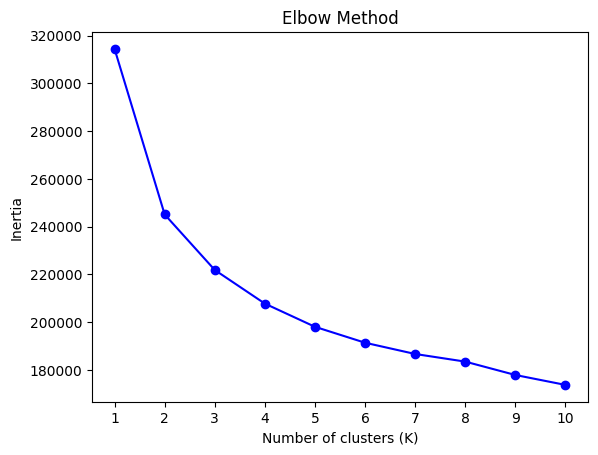

In [5]:
"""
Choosing the number of clusters
"""
getting_K_elbow_method(dataframe=X_train)

In [6]:
"""
Setting the number of clusters
"""
number_of_clusters = 5

### DagsHub

In [7]:
"""
Initializating DagsHub
"""
dagshub.init(repo_owner=REPOSITORY_OWNER, repo_name=REPOSITORY_NAME, mlflow=True)

Accessing as MaCh1Ne01

Initialized MLflow to track repo "MaCh1Ne01/mle-specialization-02"

Repository MaCh1Ne01/mle-specialization-02 initialized!

### Setting Credentials

In [8]:
"""
os.environ['MLFLOW_TRACKING_USERNAME'] = 'MaCh1Ne01'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '[GENERATED_TOKEN]'
"""

"\nos.environ['MLFLOW_TRACKING_USERNAME'] = 'MaCh1Ne01'\nos.environ['MLFLOW_TRACKING_PASSWORD'] = '[GENERATED_TOKEN]'\n"

### MLflow

In [9]:
mlflow.set_tracking_uri(MLFLOW_DAGSHUB_URL)

In [10]:
setting_experiment()

Experiment Customer Segmentation - MLE 02 Project already exists. Using existing one.
ID: 0


In [11]:
mlflow.autolog(log_models=True,)

2025/08/26 01:31:19 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.6.1, but the installed version is 1.7.1. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/08/26 01:31:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


### Models

In [12]:
base_model = GaussianMixture(n_components=number_of_clusters, random_state=SEED)

In [13]:
model_01 = KMeans(n_clusters=number_of_clusters, random_state=SEED)

In [14]:
model_02 = OPTICSKMeansEnsemble(n_clusters=number_of_clusters, random_state=SEED)

## Training

In [15]:
base_model_metrics = executing_and_saving_clustering_model(model=base_model, model_name=BASE_MODEL_NAME, X=X_train, label_data=TRAINING_DATA_LABEL)

2025/08/26 01:31:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/marcos/mle-specialization-02/mles2-env/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/08/26 01:31:24 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. T

🏃 View run Gaussian Mixture Model Run at: https://dagshub.com/MaCh1Ne01/mle-specialization-02.mlflow/#/experiments/0/runs/067c4f27dc8b4bfda59290212ce3f371
🧪 View experiment at: https://dagshub.com/MaCh1Ne01/mle-specialization-02.mlflow/#/experiments/0
**********Gaussian Mixture Metrics (Training Data):**********
Silhouette Score: 0.0586
Calinski-Harabasz Score: 1145.0731
Davies-Bouldin Score: 4.7922


In [16]:
model_01_metrics = executing_and_saving_clustering_model(model=model_01, model_name=MODEL_01_NAME, X=X_train, label_data=TRAINING_DATA_LABEL)

2025/08/26 01:31:33 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/marcos/mle-specialization-02/mles2-env/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/08/26 01:31:33 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. T

🏃 View run K-Means Model Run at: https://dagshub.com/MaCh1Ne01/mle-specialization-02.mlflow/#/experiments/0/runs/cac79b7754e5444094b21836e6053956
🧪 View experiment at: https://dagshub.com/MaCh1Ne01/mle-specialization-02.mlflow/#/experiments/0
**********K-Means Metrics (Training Data):**********
Silhouette Score: 0.1382
Calinski-Harabasz Score: 2467.1221
Davies-Bouldin Score: 2.2260


In [17]:
model_02_metrics = executing_and_saving_clustering_model(model=model_02, model_name=MODEL_02_NAME, X=X_train, label_data=TRAINING_DATA_LABEL)

2025/08/26 01:31:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/marcos/mle-specialization-02/mles2-env/lib/python3.11/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/08/26 01:32:12 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. T

🏃 View run OPTICS+K-Means Ensemble Model Run at: https://dagshub.com/MaCh1Ne01/mle-specialization-02.mlflow/#/experiments/0/runs/1dcc2d68a0234a248d2fb72622c1e6b7
🧪 View experiment at: https://dagshub.com/MaCh1Ne01/mle-specialization-02.mlflow/#/experiments/0
**********OPTICS+K-Means Ensemble Metrics (Training Data):**********
Silhouette Score: 0.1388
Calinski-Harabasz Score: 2466.8966
Davies-Bouldin Score: 2.2135


## Visualizing

In [18]:
mlflow.autolog(disable=True)

In [19]:
"""
Getting Principal Components (PCA: 2 components)
"""
X_reduced = getting_principal_components(X=X_train)

### Training Data

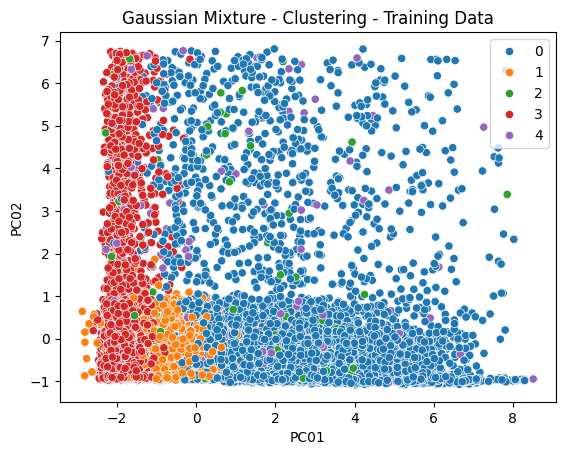

In [20]:
visualizing_clustering_model_performance(model_name=BASE_MODEL_NAME, components_dataframe=X_reduced, labels=base_model_metrics[3], label_data=TRAINING_DATA_LABEL)

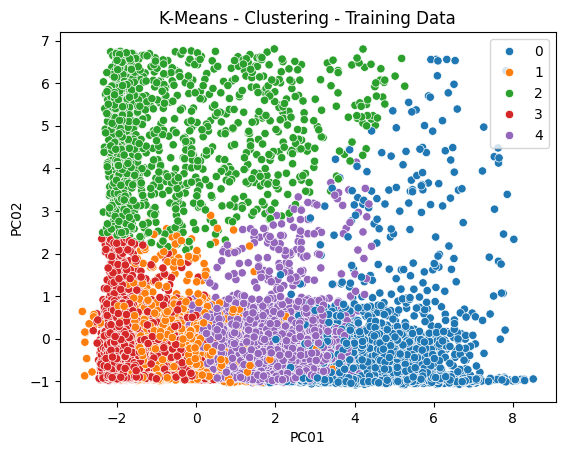

In [21]:
visualizing_clustering_model_performance(model_name=MODEL_01_NAME, components_dataframe=X_reduced, labels=model_01_metrics[3], label_data=TRAINING_DATA_LABEL)

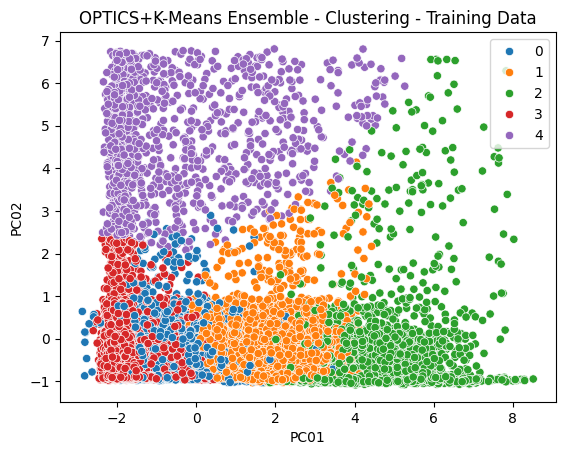

In [22]:
visualizing_clustering_model_performance(model_name=MODEL_02_NAME, components_dataframe=X_reduced, labels=model_02_metrics[3], label_data=TRAINING_DATA_LABEL)

## Results

### Silhouette, Calinski-Harabasz and Davies-Bouldin Score

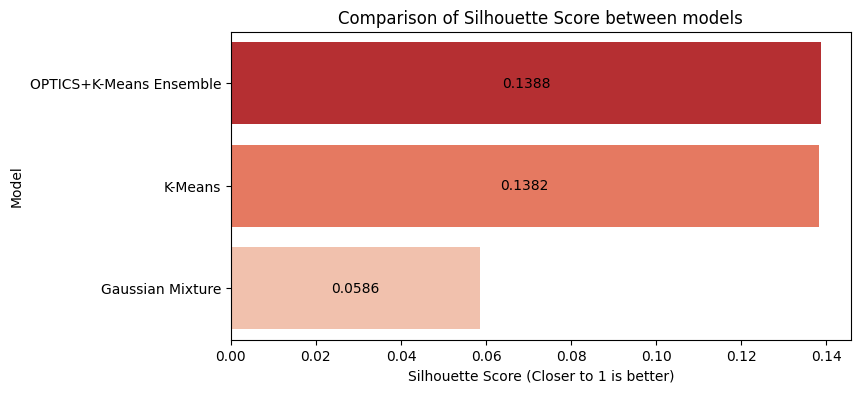

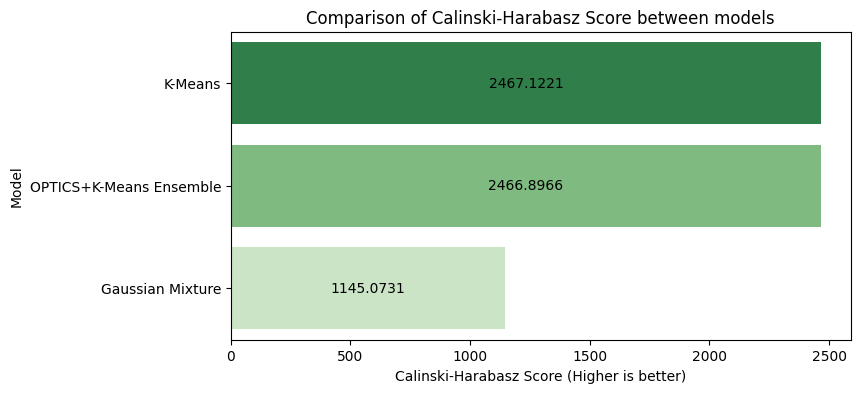

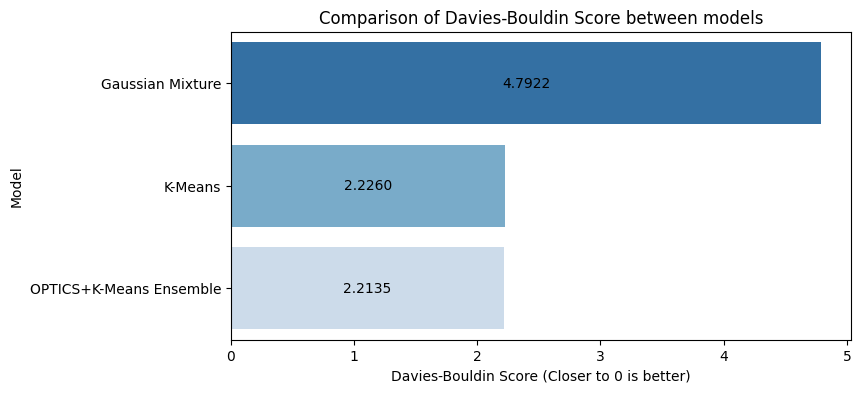

In [23]:
graphing_clustering_models_results(base_model_metrics=base_model_metrics, model_01_metrics=model_01_metrics, model_02_metrics=model_02_metrics)